In [2]:
from __future__ import print_function

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/",one_hot=False)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [9]:
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step = 100

n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784
num_classes = 10
#%

from tensorflow_estimator import estimator
# from tensorflow_estimator.python.estimator.inputs.inputs import numpy_input_fn
input_fn = estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

In [10]:
def neural_net(x_dict):
    x = x_dict['images']
    layer_1 = tf.layers.dense(x, n_hidden_1)
    layer_2 = tf.layers.dense(layer_1, n_hidden_2)
    out_layer = tf.layers.dense(layer_2, num_classes)
    return out_layer

In [12]:
def model_fn(features, labels, mode):
    logits = neural_net(features)
    
    pred_classes = tf.argmax(logits, axis=1)
    pred_probas = tf.nn.softmax(logits)
    
    if mode == estimator.ModeKeys.PREDICT:
        return estimator.EstimatorSpec(mode, predictions=pred_classes)
    
    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits,labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op, global_step=tf.train.get_global_step())
    
    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)
    
    estim_specs = estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op}
    )
    return estim_specs     

In [13]:
model = estimator.Estimator(model_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpaa5f2lld', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc5d5667ba8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
model.train(input_fn, steps=num_steps)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpaa5f2lld/model.ckpt.
INFO:tensorflow:loss = 2.42572, step = 0
INFO:tensorflow:global_step/sec: 57.6539
INFO:tensorflow:loss = 0.408721, step = 100 (1.783 sec)
INFO:tensorflow:global_step/sec: 400.143
INFO:tensorflow:loss = 0.328696, step = 200 (0.190 sec)
INFO:tensorflow:global_st

In [15]:
input_fn = estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size,shuffle=False    
)
model.evaluate(input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-26T13:24:31Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpaa5f2lld/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-26-13:24:35
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.9153, global_step = 500, loss = 0.295344
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: /tmp/tmpaa5f2lld/model.ckpt-500


{'accuracy': 0.91530001, 'global_step': 500, 'loss': 0.29534397}

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpaa5f2lld/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Model prediction: 7
Model prediction: 2
Model prediction: 1
Model prediction: 0


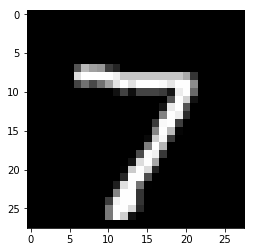

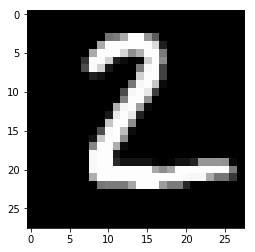

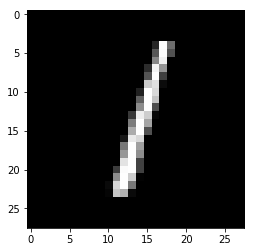

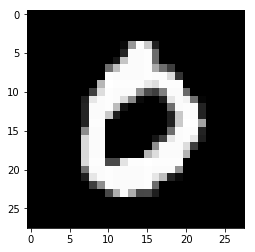

In [16]:
n_images = 4
test_images = mnist.test.images[:n_images]

input_fn = estimator.inputs.numpy_input_fn(
    x={'images':test_images}, shuffle=False
)
preds = list(model.predict(input_fn))

for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction:", preds[i])
